<div style="text-align: center;">
    <h1>
        <a href="https://www.kaggle.com/competitions/nlp-getting-started" target="_blank">Natural Language Processing with Disaster Tweets</a>
    </h1>
    <h3>Mohammad Nourbakhsh Marvast</h3>
</div>




In this project, I predict which Tweets are about real disasters and which ones are not.

First, I preprocess the text by removing non-alphabetic characters and converting to lowercase, then tokenize each review into words.

Next, I transform the tokenized text into numerical features using the tf-idf model via scikit-learn’s tfidfVectorizer.

Finally, I train a simple classifier—such as Naïve Bayes or Logistic Regression—on the extracted feature matrix and evaluate the model’s performance.

# Imports

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

from sklearn.model_selection import train_test_split;
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score;

# Loading Data

In [2]:
from google.colab import files
files.upload()

{}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle competitions download -c nlp-getting-started

nlp-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip nlp-getting-started.zip

Archive:  nlp-getting-started.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# Data Cleaning

## Removing HTML Tags

In [8]:
from bs4 import BeautifulSoup

In [9]:
def remove_html(raw_tweet):

  tweet = BeautifulSoup(raw_tweet).get_text()

  return tweet

## Dealing with Punctuation, Numbers, Stopwords, and Extraction of the Root of Words

In [10]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [11]:
def meaning_extraction(raw_tweet, stop_words= set(stopwords.words('english'))):

  # 1. Strip HTML and lowercase
  #print('Removing HTML Tags')
  #print('====================')
  tweet = remove_html(raw_tweet).lower()

  # 2. Collapse any char repeated ≥3 times to exactly 2
    #    e.g. "sooooo" → "soo", "haaaaaap" → "haap"
  tweet = re.sub(r'(.)\1{2,}', r'\1\1', tweet)

  # 3. Remove everything except a–z, replace with spaces
  #print('Removing Meaningless Characters')
  #print('====================')
  clean_tweet = re.sub(pattern= '[^a-z]',
                        repl= ' ',
                        string = tweet)
  words = clean_tweet.split(' ')

  # 4. Tokenize on whitespace and Stem and filter stopwords
  #print('MeaningFul Words Extraction')
  #print('====================')
  ps = PorterStemmer()
  meaningful_words = [ps.stem(w.strip()) for w in words if (w.strip()) and (not w in stop_words)]

  return ' '.join(meaningful_words)

In [12]:
temp_df= df.copy()

In [13]:
temp_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:
stop_words= set(stopwords.words('english'))
temp_df['text']= temp_df['text'].apply(meaning_extraction, stop_words)

<ipython-input-14-0651512933ef>:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  temp_df['text']= temp_df['text'].apply(meaning_extraction, stop_words)


## Vectorize Reviews Bag of Words

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf= TfidfVectorizer(max_features= 1000,
                       lowercase= False)
list_tweets = list(temp_df['text'])
tfidf_tweets = tfidf.fit_transform(list_tweets)

In [17]:
X = tfidf_tweets.toarray()
y = df['target']

# Model Training

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 101)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model_LR= LogisticRegression(max_iter= 200)
model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [25]:
y_pred = model_LR.predict(X_test)

Model Evaluation

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1330
           1       0.77      0.70      0.73       954

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.78      2284
weighted avg       0.79      0.79      0.79      2284


Confusion Matrix


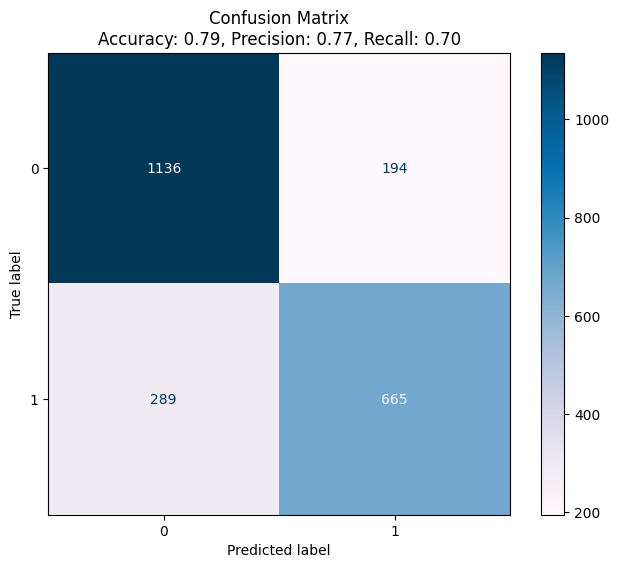

In [26]:
print('====================')
print('Model Evaluation')
print('====================')
print()

print('====================')
print('Classification Report')
print('====================')
print(classification_report(y_test, y_pred))
print()

print('====================')
print('Confusion Matrix')
print('====================')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

class_names = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=class_names)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='PuBu', values_format='d')
ax.set_title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')
plt.show()

## Naive Bayes

In [27]:
from sklearn.naive_bayes import BernoulliNB

In [28]:
model_NB = BernoulliNB()
model_NB.fit(X_train, y_train)

BernoulliNB()

In [29]:
y_pred = model_NB.predict(X_test)

Model Evaluation

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1330
           1       0.79      0.69      0.74       954

    accuracy                           0.80      2284
   macro avg       0.80      0.78      0.79      2284
weighted avg       0.80      0.80      0.79      2284


Confusion Matrix


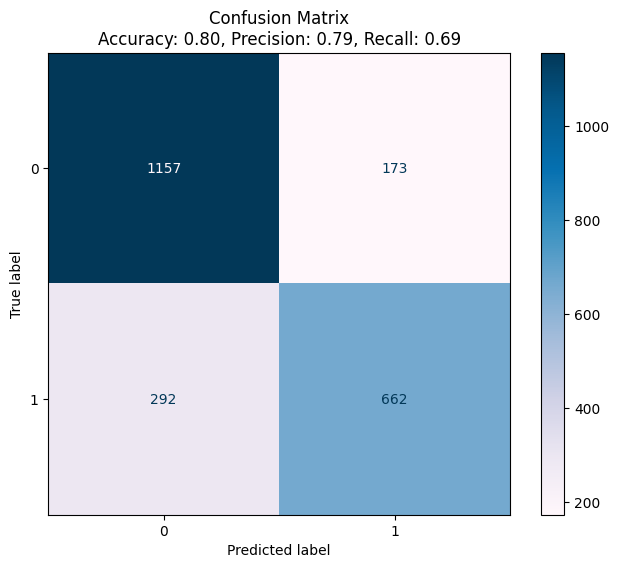

In [30]:
print('====================')
print('Model Evaluation')
print('====================')
print()

print('====================')
print('Classification Report')
print('====================')
print(classification_report(y_test, y_pred))
print()

print('====================')
print('Confusion Matrix')
print('====================')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

class_names = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=class_names)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='PuBu', values_format='d')
ax.set_title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')
plt.show()

## Support Vector Machine

In [31]:
from sklearn.svm import SVC

In [32]:
model_SVC = SVC()
model_SVC.fit(X_train, y_train)

SVC()

In [33]:
y_pred = model_SVC.predict(X_test)

Model Evaluation

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1330
           1       0.80      0.66      0.73       954

    accuracy                           0.79      2284
   macro avg       0.79      0.77      0.78      2284
weighted avg       0.79      0.79      0.79      2284


Confusion Matrix


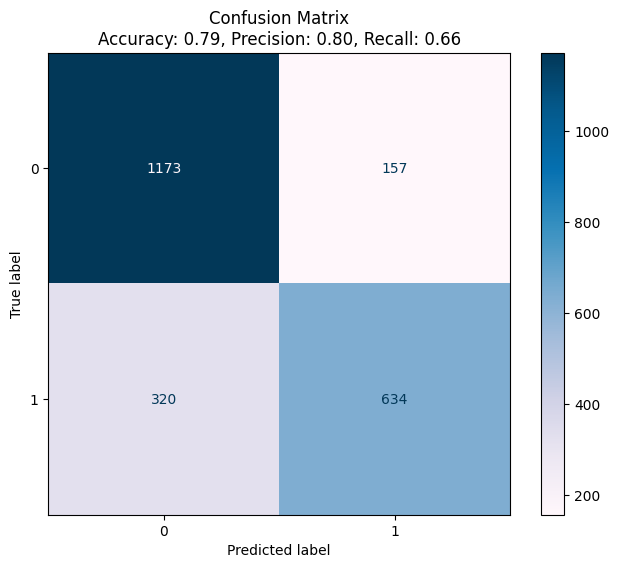

In [34]:
print('====================')
print('Model Evaluation')
print('====================')
print()

print('====================')
print('Classification Report')
print('====================')
print(classification_report(y_test, y_pred))
print()

print('====================')
print('Confusion Matrix')
print('====================')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

class_names = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=class_names)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='PuBu', values_format='d')
ax.set_title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')
plt.show()

# Test.csv

In [35]:
test= pd.read_csv('test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [36]:
test['text'] = test['text'].apply(meaning_extraction, stop_words)

<ipython-input-36-98e5a9ded331>:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  test['text'] = test['text'].apply(meaning_extraction, stop_words)


In [37]:
test_list = list(test['text'])
test_tfidf = tfidf.transform(test_list)
test_X = test_tfidf.toarray()
test_X = scaler.transform(test_X)

In [38]:
y_pred = model_LR.predict(test_X)

In [39]:
csv = pd.DataFrame({'id': test['id'], 'target': y_pred})
csv.to_csv('submission.csv', index= False)